In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
# Load your dataset
data = pd.read_csv("Cleaned CO2 Emissions.csv")

In [23]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Vehicle_Make               7385 non-null   object 
 1   Vehicle_Model              7385 non-null   object 
 2   Vehicle_Class              7385 non-null   object 
 3   Engine_Size                7385 non-null   float64
 4   Cylinders                  7385 non-null   int64  
 5   Fuel_Type                  7385 non-null   object 
 6   Fuel_Consumption_City      7385 non-null   float64
 7   Fuel_Consumption_Highway   7385 non-null   float64
 8   Fuel_Consumption_Combined  7385 non-null   float64
 9   Transmission               7385 non-null   object 
 10  Transmission_Type          7385 non-null   object 
 11  Gears                      7385 non-null   int64  
 12  CO2_Emissions              7385 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage:

In [25]:
# Define columns
numeric_features = ['Engine_Size', 
                    'Cylinders', 
                    'Fuel_Consumption_City', 
                    'Fuel_Consumption_Highway', 
                    'Fuel_Consumption_Combined', 
                    'Gears']
categorical_features = ['Vehicle_Make', 
                        'Vehicle_Model', 
                        'Vehicle_Class', 
                        'Transmission', 
                        'Fuel_Type', 
                        'Transmission_Type']


In [27]:
# Separate features and target variable
X = data.drop(columns=['CO2_Emissions'])
y = data['CO2_Emissions']

In [29]:
# Preprocessing pipeline for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [31]:
# Define models
ada_boost = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', AdaBoostRegressor(n_estimators=50, random_state=42))])

linear_regression = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', LinearRegression())])

In [33]:
# Define cross-validation strategy
cv = 5  # 5-fold cross-validation

In [35]:
# Cross-validate Adaptive Boosting Regressor
ada_cv_scores = cross_val_score(ada_boost, X, y, cv=cv, scoring='neg_mean_squared_error')
ada_cv_rmse = np.sqrt(-ada_cv_scores)
ada_cv_mean_rmse = ada_cv_rmse.mean()
ada_cv_r2_scores = cross_val_score(ada_boost, X, y, cv=cv, scoring='r2')
ada_cv_mean_r2 = ada_cv_r2_scores.mean()

In [36]:
# Cross-validate Linear Regression
lr_cv_scores = cross_val_score(linear_regression, X, y, cv=cv, scoring='neg_mean_squared_error')
lr_cv_rmse = np.sqrt(-lr_cv_scores)
lr_cv_mean_rmse = lr_cv_rmse.mean()
lr_cv_r2_scores = cross_val_score(linear_regression, X, y, cv=cv, scoring='r2')
lr_cv_mean_r2 = lr_cv_r2_scores.mean()

In [37]:
# Compile results into a table
results = pd.DataFrame({
    "Model": ["Adaptive Boosting Regressor", "Linear Regression"],
    "Mean RMSE": [ada_cv_mean_rmse, lr_cv_mean_rmse],
    "Mean R² Score": [ada_cv_mean_r2, lr_cv_mean_r2]
})

In [38]:
# Display the results
print("Cross-Validation Results")
print(results)

Cross-Validation Results
                         Model  Mean RMSE  Mean R² Score
0  Adaptive Boosting Regressor  13.499560       0.945954
1            Linear Regression   5.456686       0.990946


In [39]:
# Adaptive Boosting Regressor predictions
ada_pred = cross_val_predict(ada_boost, X, y, cv=5)
ada_rmse = np.sqrt(mean_squared_error(y, ada_pred))
ada_r2 = r2_score(y, ada_pred)

In [40]:
# Linear Regression predictions
lr_pred = cross_val_predict(linear_regression, X, y, cv=5)
lr_rmse = np.sqrt(mean_squared_error(y, lr_pred))
lr_r2 = r2_score(y, lr_pred)

In [41]:
# Compile results into a table
results = pd.DataFrame({
    "Model": ["Adaptive Boosting Regressor", "Linear Regression"],
    "Cross-Validated RMSE": [ada_rmse, lr_rmse],
    "Cross-Validated R² Score": [ada_r2, lr_r2]
})

In [42]:
print("Cross-Validation Prediction Results")
print(results)

Cross-Validation Prediction Results
                         Model  Cross-Validated RMSE  Cross-Validated R² Score
0  Adaptive Boosting Regressor             13.560223                  0.946285
1            Linear Regression              5.635654                  0.990722


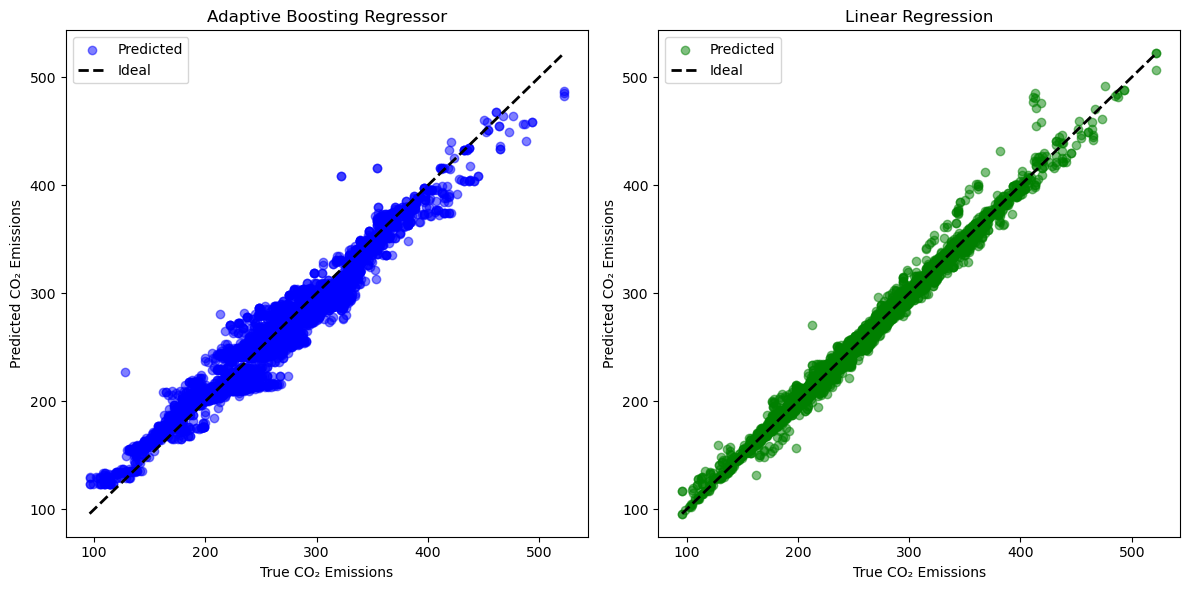

In [43]:
import matplotlib.pyplot as plt

# Plot true values vs predicted values for both models
plt.figure(figsize=(12, 6))

# Adaptive Boosting Regressor
plt.subplot(1, 2, 1)
plt.scatter(y, ada_pred, color='blue', alpha=0.5, label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=2, label="Ideal")
plt.xlabel("True CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Adaptive Boosting Regressor")
plt.legend()

# Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y, lr_pred, color='green', alpha=0.5, label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=2, label="Ideal")
plt.xlabel("True CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Linear Regression")
plt.legend()

plt.tight_layout()
plt.show()